# Clustering techniques
- K-means
- Gaussian Mixture model & EM-steps
  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.datasets import load_sample_image

In [2]:
%matplotlib inline

In [3]:
def compare_images(img, img_compressed, k):
    """
    Show the compressed and uncompressed image side by side

    Args:
        img:            np.array, shape=[image size]
                        original image (before img_compressed)
        img_compressed: np.array, shape=[image size]
                        compressed image
        k:              int or str
                        The number of cluster
    """

    fig, ax = plt.subplots(1, 2, figsize=(16, 12))
    axes[0].set_axis_off()
    if isinstance(k, str):
        ax[0].set_title(k)
    else:
        ax[0].set_title(f"Compressed to {k} colors")

    ax[0].imshow(img_compressed)
    ax[1].set_axis_off()  # not visualize axes
    ax[1].set_title("Original")
    ax[1].imshow(img)


## K-means

Image color clustering


__input__
image(RGB):      np.array, shape=[HxW, 3]

__output__
image_compressed (with k colors):   np.array, shape[H, W, 3]

### Data load

In [4]:
X = load_sample_image("flower.jpg")

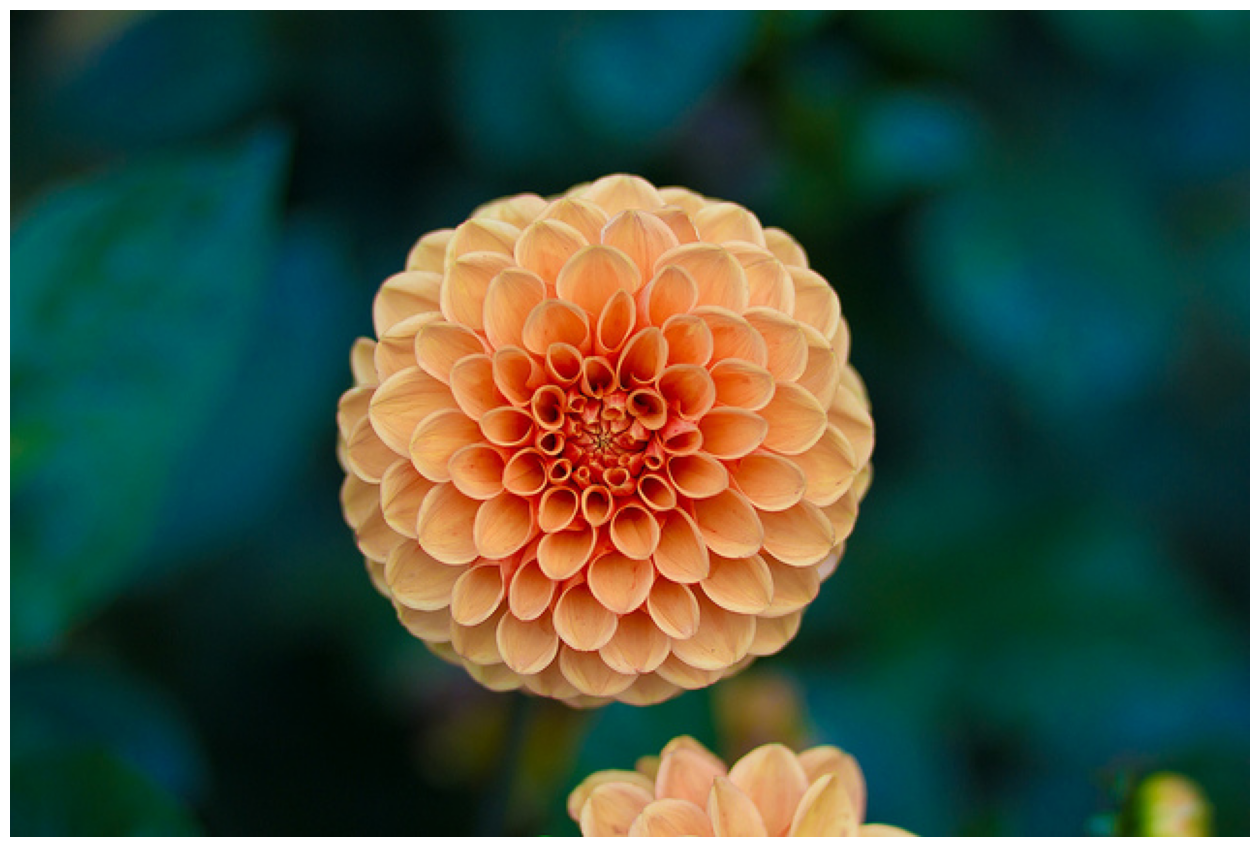

In [5]:
fig, axis = plt.subplots(figsize = (16, 12))
axis.set_axis_off()
axis.imshow(X)

In [6]:
"""
Args:
    X:  np.array of size N x D
        where N is the number of samples and D is the data dimensionality
        If the RGB image is input, the shape of input is going to be [HxW, 3]
    k:  int
        Number of clusters

Returns:
    mu: np.array of size k x D
        Cluster centers
    z:  np.array of size N
        Cluster indicators, i.e. id of color, such as 0...k-1 for each color
"""

'\nArgs:\n    X:  np.array of size N x D\n        where N is the number of samples and D is the data dimensionality\n        If the RGB image is input, the shape of input is going to be [HxW, 3]\n    k:  int\n        Number of clusters\n\nReturns:\n    mu: np.array of size k x D\n        Cluster centers\n    z:  np.array of size N\n        Cluster indicators, i.e. id of color, such as 0...k-1 for each color\n'

In [7]:
k = 5

In [8]:
# reshape the input when it has more than 2 dimensions
print(X.shape)
print(len(X.shape))

if len(X.shape) > 2:
    ch = X.shape[2]
    reshaped_X = X.reshape([-1, ch])
print(reshaped_X.shape)

(427, 640, 3)
3
(273280, 3)


In [9]:
# sample 1
sample_1 = reshaped_X[0][:]
print(sample_1)

[ 2 19 13]


In [10]:
# Initializing centroid
N = reshaped_X.shape[0]
print(N)
centroids_id = []
centroids = []
center = np.random.choice(N)
centroids_id.append(center)
centroids.append(reshaped_X[center][:])
print(centroids)

273280
[array([ 0, 79, 83], dtype=uint8)]


In [11]:
V_2 = np.zeros((N, k))

In [12]:
sub = []
squared = []
squared_sum = []

In [13]:
# subtract every sample point from centroid
sub.append(reshaped_X - centroids[0][None, :])
squared.append(sub[0] ** 2)
squared_sum.append(np.sum(squared[0], -1))
V_2[:, 0] = squared_sum[0]

In [14]:
print(V_2)

[[ 56.   0.   0.   0.   0.]
 [182.   0.   0.   0.   0.]
 [238.   0.   0.   0.   0.]
 ...
 [323.   0.   0.   0.   0.]
 [405.   0.   0.   0.   0.]
 [161.   0.   0.   0.   0.]]


In [15]:
print(squared_sum[0].shape)

(273280,)


In [16]:
# obtain the most distancing sample
next_centroid = np.argmax(squared_sum[0])
centroids_id.append(next_centroid)
centroids.append(reshaped_X[next_centroid][:])
V_2[next_centroid][:] = np.zeros(k)
print(next_centroid)
print(centroids)

126994
[array([ 0, 79, 83], dtype=uint8), array([181,  26,   0], dtype=uint8)]


In [17]:
# substract every sample point from centroid
sub.append(reshaped_X - centroids[1][None, :])
squared.append(sub[1] ** 2)
squared_sum.append(np.sum(squared[1], -1))
V_2[:, 1] = squared_sum[1]
print(V_2)

[[ 56. 259.   0.   0.   0.]
 [182. 429.   0.   0.   0.]
 [238. 273.   0.   0.   0.]
 ...
 [323. 228.   0.   0.   0.]
 [405. 354.   0.   0.   0.]
 [161. 394.   0.   0.   0.]]


In [18]:
print(squared_sum[1].shape)

(273280,)


In [19]:
next_centroid = np.max(V_2, -1).argmax()
centroids_id.append(next_centroid)
centroids.append(reshaped_X[next_centroid][:])
V_2[next_centroid][:] = np.zeros(k)
print(centroids)

[array([ 0, 79, 83], dtype=uint8), array([181,  26,   0], dtype=uint8), array([ 0, 65, 53], dtype=uint8)]


In [20]:
sub.append(reshaped_X - centroids[2][None, :])
squared.append(sub[2] ** 2)
squared_sum.append(np.sum(squared[2], -1))
V_2[:, 2] = squared_sum[2]
print(V_2)

[[ 56. 259. 136.   0.   0.]
 [182. 429. 234.   0.   0.]
 [238. 273. 346.   0.   0.]
 ...
 [323. 228. 267.   0.   0.]
 [405. 354. 321.   0.   0.]
 [161. 394. 473.   0.   0.]]


In [20]:
def reshape_input(X):
    if len(X.shape) > 2:
        ch = X.shape[2]
        reshaped_X = X.reshape([-1, ch])
    else:
        reshaped_X = X
    return reshaped_X

In [29]:
def init_centroid(X, k):
    """
    Args:
        X:      np.array, shape=[H, W, D] (not reshaped)
                The input image to be clustered into k colors
        k:      int
                The number of the clusters
    
    Returns:
        initial_centroids:      np.array shape=(k, D)
                                reasonably selected k centroids
        initial_centroids_id:   np.array, shape=(k,)
                                ids of selected samples as initial centroid
    
    """
    reshaped_X = reshape_input(X)
    # Obtain the number of the sample
    N, D = reshaped_X.shape

    centroids_id = []
    centroids = []
    V_2 = np.zeros((N, k))
    sub = []
    squared = []
    squared_sum = []

    for i in range(k):
        if i == 0:
            # Randomly selects sample as an initial centroid
            center = np.random.choice(N)
            # print(V_2[center][:])
        else:
            center = np.sum(V_2, -1).argmax()

        centroids_id.append(center)
        centroids.append(reshaped_X[center][:])
        # Subtract every sample point from centroid
        sub.append(reshaped_X - centroids[i][None, :])
        # Squared each entries
        squared.append(sub[i] ** 2)
        # Calculate sum of squared
        squared_sum.append(np.sum(squared[i], -1))
        # copy onto the V_2 which will store k-distance for each entries
        V_2[:, i] = squared_sum[i]
        V_2[center][:] = np.zeros(k)

        # print(V_2[center][:])
        # print(center)
    
    array_centroids = np.zeros((k, D))
    array_centroids_id = np.zeros(k)

    for idx, value in enumerate(centroids):
        array_centroids[idx][0] = centroids[idx][0]
        array_centroids[idx][1] = centroids[idx][1]
        array_centroids[idx][2] = centroids[idx][2]
        array_centroids_id[idx] = centroids_id[idx]
    # print(array_centroids)
    # print(array_centroids_id) 
    return array_centroids, array_centroids_id

In [46]:
cents, cents_id = init_centroid(X, k)

In [24]:
print(cents)

[[243. 205. 169.]
 [ 62.   2.   2.]
 [  9.  55.  55.]
 [212. 152. 116.]
 [159. 108.  63.]]


In [25]:
print(cents[:][0].shape)
k = 5
D = X.shape[-1]
print(D)
cents_array = np.zeros((k, D))

for idx, coords in enumerate(cents):
    cents_array[idx] = coords

print(cents_array)
print(cents_array.shape)

(3,)
3
[[243. 205. 169.]
 [ 62.   2.   2.]
 [  9.  55.  55.]
 [212. 152. 116.]
 [159. 108.  63.]]
(5, 3)


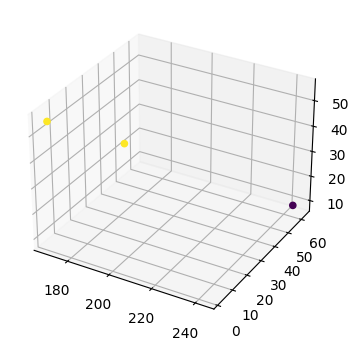

In [26]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()

max_ax = np.max(cents)

x, y, z = cents_array[:][0], cents_array[:][1], cents_array[:][2]

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c = z, alpha = 1)
plt.show()

5
(5, 3)


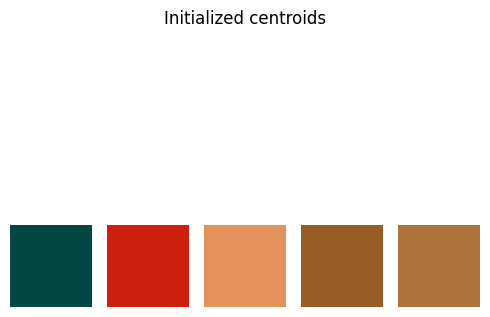

In [52]:
print(len(cents))
cents = np.array(cents)
_cents = cents/255
print(cents.shape)
colors = []
for i in range(_cents.shape[0]):
    colors.append(np.expand_dims(_cents[i], axis = (0, 1)))

colors[0].shape
fig, axes = plt.subplots(1, k, figsize = (5, 5))
fig.suptitle("Initialized centroids")
for id, ax in enumerate(axes):
    ax.imshow(colors[id])
    ax.set_axis_off()
    

In [28]:
print(cents_id)

[ 90643. 155208. 133007. 259608. 159550.]


## Compute a k-means clustering for the data X

In [29]:
X = load_sample_image("flower.jpg")

In [30]:
"""
Parameters
--------------
X:      np.array, shape=[N, D]
        where N is the number of samples and D is the data dimensionality
k:      int
        Number of clusters

Returns
--------------
mu:     np.array, shape=[k, D]
        Cluster centers
z:      np.array, size N
        Cluster indicators, i.e. a number in 0..k-1, for each data point in X
"""

# Obtain the reshaped data (2-dim, (HxW)xch)
reshaped_input = reshape_input(X)
# Obtain the reshaped data's shape
N, D = reshaped_input.shape

# initialize centroids
mu, mu_sample_id = init_centroid(X, k = k)

# initialize the cluster indicator
z = np.empty(N, dtype=np.int)
J_prev = None



[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
80191
[0. 0. 0. 0. 0.]
133985
[0. 0. 0. 0. 0.]
90622
[0. 0. 0. 0. 0.]
164830
[0. 0. 0. 0. 0.]
60927
[[  3.  37.  38.]
 [206. 112.  60.]
 [245. 187. 113.]
 [176.   6.   7.]
 [  3.  81.  91.]]
[ 80191. 133985.  90622. 164830.  60927.]


/tmp/ipykernel_13938/3719499543.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = np.empty(N, dtype=np.int)


### k-means Lloyd's algorithm (single iteration)


[0 0 0 ... 0 0 0]


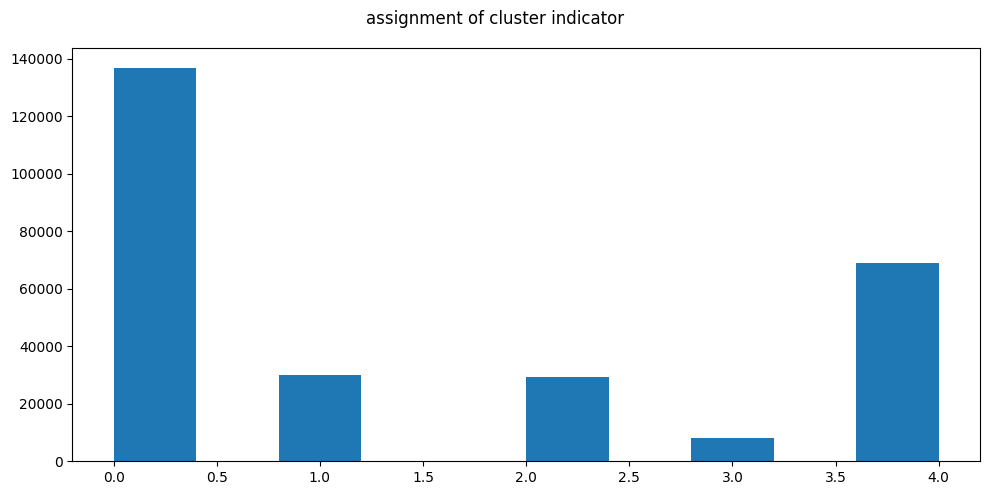

In [31]:
# update cluster indicator
# assign cluster by taking a centroid which has minimum distance to sample

# Take squared subtraction
sub_forz = reshaped_input[:, None] - mu[None]
squared_sub_forz = sub_forz ** 2
sum_squared_sub_forz = squared_sub_forz.sum(axis = -1)
z = sum_squared_sub_forz.argmin(axis = -1)

# plot 
fig, ax = plt.subplots(figsize = [10, 5])

plt.hist(z)
plt.suptitle("assignment of cluster indicator")
print(z)


In [32]:
# Count data points per cluster
N_k = np.bincount(z, minlength=k)
print(N_k)

[136943  29872  29276   8039  69150]


In [33]:
# Restart if we lost any clusters
if np.any(N_k == 0):
    mu = reshaped_input[np.random.choice(N, size=k, replace=False)]
    J_prev = None
    # continue

# Update centroids
for i in range(k):
    mu[i] = reshaped_input[z==i].sum(axis = 0)
mu = mu/N_k[:, None]

# ReCompute the distortion
J = ((reshaped_input - mu[z] ** 2)).sum()

# Check for convergence
if J_prev is None or J<J_prev:
    J_prev = J
else:
    pass
    # break

Function for k-means Lolyd's algorithm

In [57]:
def kmeans(X, k, max_iters, init_cent = 'random'):
        """
        Parameters
        --------------
        X:      np.array, shape=[N, D]
                where N is the number of samples and D is the data dimensionality
        k:      int
                Number of clusters
        max_iters:      int
                        maximum number of iterations
        init_cent:      str in ['random']
                        radom init or reasonable
        Returns
        --------------
        mu:     np.array, shape=[k, D]
                Cluster centers
        z:      np.array, size N
                Cluster indicators, i.e. a number in 0..k-1, for each data point in X
        """
        # Obtain the reshaped data (2-dim, (HxW)xch)
        reshaped_input = reshape_input(X)
        # Obtain the reshaped data's shape
        N, D = reshaped_input.shape

        # initialize centroids
        if init_cent != 'random':
                mu, _ = init_centroid(X, k = k)
        else:
                mu = reshaped_input[np.random.choice(N, size=k, replace=False)].astype(np.float)

        # initialize the cluster indicator
        z = np.empty(N, dtype=int)
        # initialize te container of the updated minimum distance to the assigned cluster centroids
        J_prev = None

        # update cluster indicator
        # assign cluster by taking a centroid which has minimum distance to sample
        iter = 0
        while iter<max_iters:
                # print(iter)
                # Take squared subtraction
                sub_forz = reshaped_input[:, None] - mu[None]
                squared_sub_forz = sub_forz ** 2
                sum_squared_sub_forz = squared_sub_forz.sum(axis = -1)
                z = sum_squared_sub_forz.argmin(axis = -1)

                # Count data points per cluster
                N_k = np.bincount(z, minlength=k)
                # print(N_k)


                # Restart if we lost any clusters
                if np.any(N_k == 0):
                        mu = reshaped_input[np.random.choice(N, size=k, replace=False)]
                        J_prev = None
                        continue

                # Update centroids
                for i in range(k):
                        mu[i] = reshaped_input[z==i].sum(axis = 0)
                mu = mu/N_k[:, None]

                # ReCompute the distortion
                J = ((reshaped_input - mu[z] ** 2)).sum()

                # Check for convergence
                if J_prev is None or J<J_prev:
                        J_prev = J
                else:
                        break
                iter = iter + 1
        return mu, z



Initialized by reasonable centroids
-----------------------------------



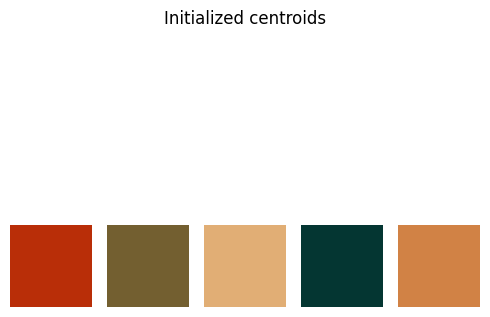

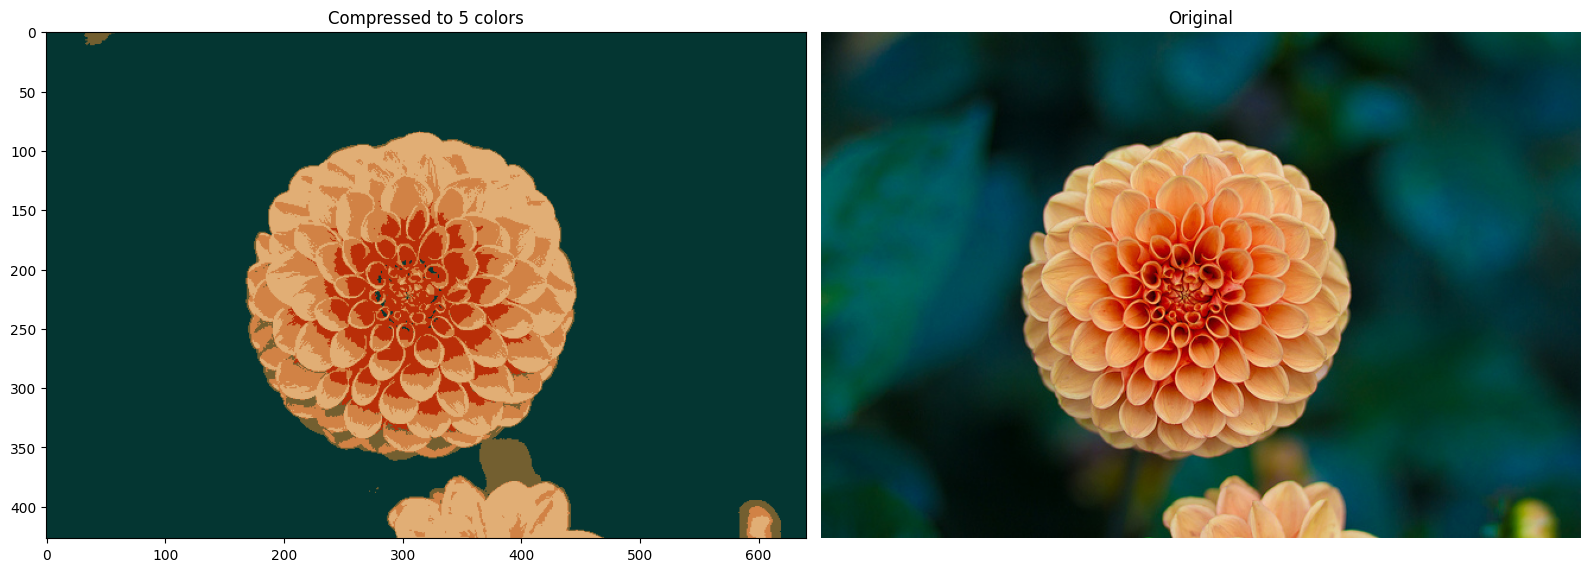

In [65]:
# Cluster the color values
print(
"""
Initialized by reasonable centroids
-----------------------------------
""")
k = 5
max_iters = 2000
mu, z = kmeans(X.reshape((-1, 3)), k, max_iters, init_cent='reasonable')

# Replace each pixel with its cluster color
X_compressed = mu[z].reshape(X.shape).astype(np.uint8)

mu = mu/255
_reasonable_mu = mu

colors = []
for i in range(mu.shape[0]):
    colors.append(np.expand_dims(mu[i], axis = (0, 1)))

colors[0].shape
fig, axes = plt.subplots(1, k, figsize = (5, 5))
fig.suptitle("Initialized centroids")
for id, ax in enumerate(axes):
    ax.imshow(colors[id])
    ax.set_axis_off()

# Show the images side by side
compare_images(X, X_compressed, k)


Initialized by reasonable centroids
-----------------------------------



/tmp/ipykernel_13938/3585478435.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mu = reshaped_input[np.random.choice(N, size=k, replace=False)].astype(np.float)


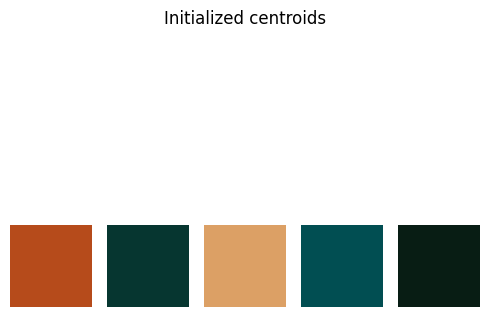

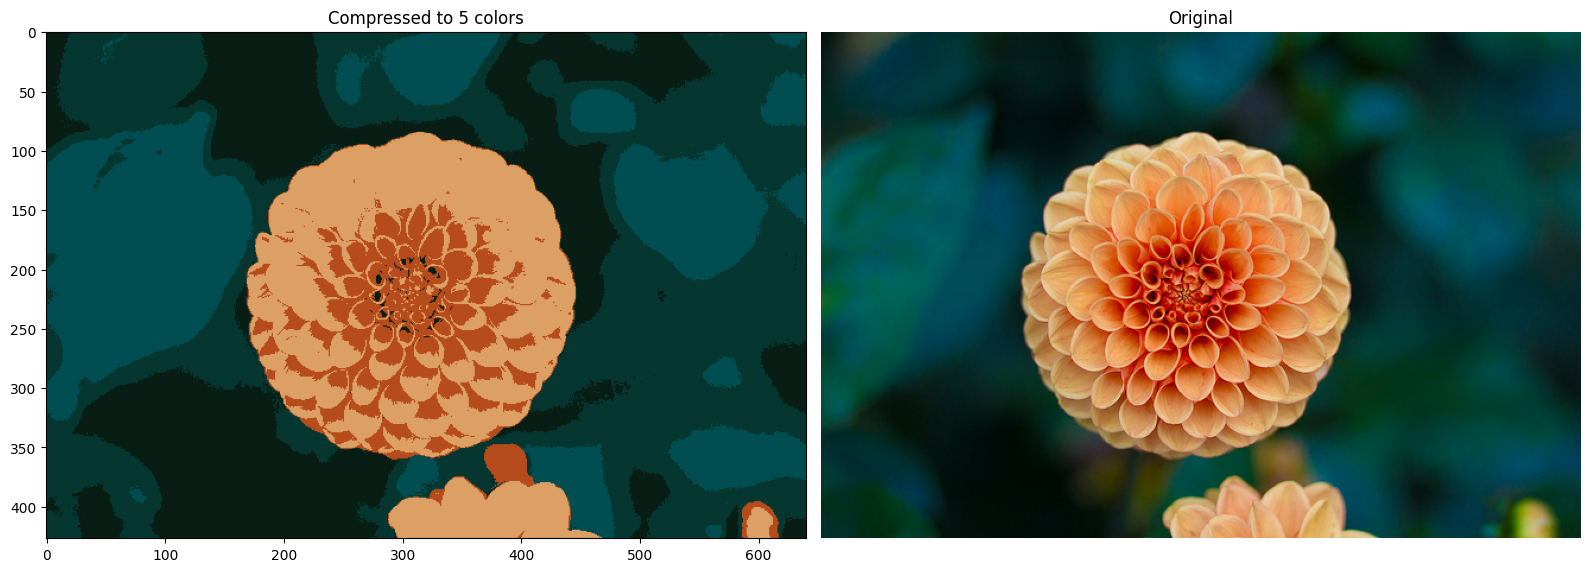

In [66]:
# Cluster the color values
print(
"""
Initialized by reasonable centroids
-----------------------------------
""")
k = 5
max_iters = 2000
mu, z = kmeans(X.reshape((-1, 3)), k, max_iters, init_cent='random')

# Replace each pixel with its cluster color
X_compressed = mu[z].reshape(X.shape).astype(np.uint8)

mu = mu/255
_random_mu = mu

colors = []
for i in range(mu.shape[0]):
    colors.append(np.expand_dims(mu[i], axis = (0, 1)))

colors[0].shape
fig, axes = plt.subplots(1, k, figsize = (5, 5))
fig.suptitle("Initialized centroids")
for id, ax in enumerate(axes):
    ax.imshow(colors[id])
    ax.set_axis_off()

# Show the images side by side
compare_images(X, X_compressed, k)

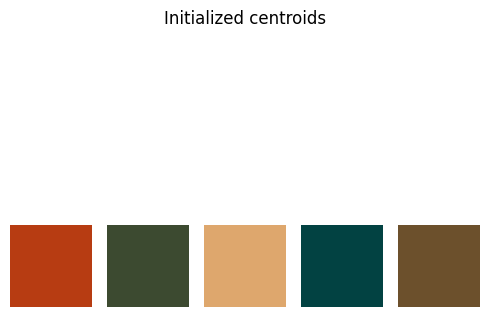

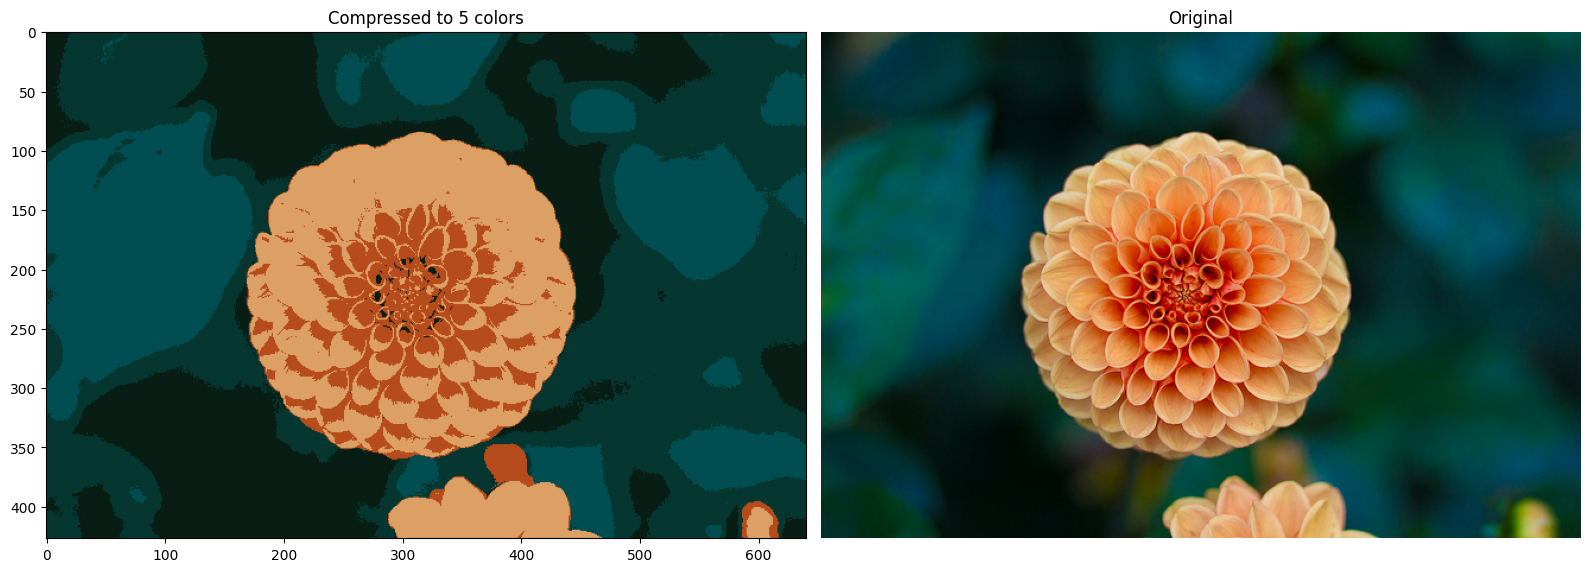

In [67]:
mixed_mu = (_reasonable_mu + _random_mu)/2.0

colors = []
for i in range(mixed_mu.shape[0]):
    colors.append(np.expand_dims(mixed_mu[i], axis = (0, 1)))

colors[0].shape
fig, axes = plt.subplots(1, k, figsize = (5, 5))
fig.suptitle("Initialized centroids")
for id, ax in enumerate(axes):
    ax.imshow(colors[id])
    ax.set_axis_off()

# Show the images side by side
compare_images(X, X_compressed, k)

# GMM (Gaussian Mixture Models and EM algorithms)
##
[Goal]: Design a probabilistic model for the data $p(x|\theta)$
- Given $\theta$, we can sample data x from a mixture of gaussian distributions
- Parameterized by $\theta$ which we want to estimate such that maximize the expected joint log-likelihood
- Using latent variable $\mathbf{z}$ as a helper and joint probability, other wise we can not do anything,
- Typically Generative model, uses a latent variable
  - Class indicator for multiple classification
  - Latent variable (cluster indicator) for Gaussian Distribution Model
  - 
- Typically, Generative model consists 
  - cluster(class) conditional distribution (Gaussian Distribution)
      $$
      \mathbf{P}(x_i | \mu_k, \Sigma_k) = \mathcal{N}(x_i | \mu_k, \Sigma_k)
      $$
    - $\mu_k$ = center of cluster (class) k Gaussian distribution
    - $\Sigma_k$ = covariance matrix for cluster k Gaussian distribution
  - prior distribution (class or cluster distribution)
      $$
      \mathbf{P}(z_k | \pi_k) = \pi_k
      $$
 
- we would like to know **mixture of k-Gaussian distribution**
$$
\mathbf{P}(\mathbf{X} | z) =\quad
\sum_{k=1}^K P(\mathbf{X}|z_k)P(z_k|\theta)
\\
=\sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{X} | \mu_k, \Sigma_k)
=\prod_{i=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x_i} | \mu_k, \Sigma_k)
$$

## Learning process => parameter ${\pi, \mu, \Sigma}$ optimization
$$
\pi^*, \mu^*, \Sigma^* = arg\max_{\pi, \mu, \Sigma} \mathbb{E}_{z={\mathbf{r}_t}}[log P(\mathbf{x}, z | \mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma})]
$$

## Inference process
- use optimized parameters to inference probabilistic cluster assignment to a sample $x_i$
- Probability such that $x_i$ is assigned to cluster k
$$
\mathbf{P}(z_{ik}=1 | x_i, \pi^{(t)}, \mu^{(t)}, \Sigma^{(t)})
=\frac{\pi_k \mathcal{N}(x_i | \mu_k^{(t)}, \Sigma_k^{(t)})}{\sum_{l=1}^k \pi_l \mathcal{N}(x_i | \mu_l^{(t)}, \Sigma_l^{(t)})}
$$

## EM algorithms
### E-step (inference with iteratively optimized parameters after t_iteration)
__Evaluate posterior distribution__

- Probability such that sample $x_i$ will be assigned to the cluster k
- $[z_i1, z_i2, z_i3, z_i4, ... z_ik] = [0.5, 0.1, 0.1, ,,,, 0.001]$ 
$$
\mathbf{r}_t(z_{ik}=1) =\quad
\mathbf{P}(z_{ik}=1 | x_i, \pi^{(t)}, \mu^{(t)}, \Sigma^{(t)})
=\frac{\pi_k \mathcal{N}(x_i | \mu_k^{(t)}, \Sigma_k^{(t)})}{\sum_{l=1}^k \pi_l \mathcal{N}(x_i | \mu_l^{(t)}, \Sigma_l^{(t)})}
$$

- obtain the expectation of joint log likelihood
- use parameters optimized at t-th iterations

### M-step (learning process, obtain parameters such that they maximize expected joint log likelihood)

$$
\pi^*, \mu^*, \Sigma^* = arg\max_{\pi, \mu, \Sigma} \mathbb{E}_{z={\mathbf{r}_t}}[log P(\mathbf{x}, z | \mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma})]
$$

# GMM and K-means
- Where we assume all cluster Gaussian distribution have same isotropic covariance and we express a covariance matrix (diagonal) as following
$$\Sigma_{k} = \sigma^2 \mathbf{I}$$

- When we bring $\sigma$ to 0, 
  - Estep is going to be equivalent with Lloyd's algorithm 1st step
$$
\mathcal{N}(x_i | \mu_k, \sigma_k) = \frac{1}{\sqrt[]{2\pi\sigma^2}}(-\frac{1}{2\sigma^2}||x_i - \mu_k||_2^2)
$$
if $k = arg\min_k||x_i-\mu_k||$
$$
P(zik=1 | x_i) = rt(z_ik = 1) = \infty
$$
else
P(z_ik=1 | x_i) = rt(z_ik = 1) = 0

- this is equivalent with hard-assignment of latent variables

## GMM log probability
$$
\mathbf{P}(\mathbf{X} | z) =\quad
\sum_{k=1}^K P(\mathbf{X}|z_k)P(z_k|\theta)
\\
=\sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{X} | \mu_k, \Sigma_k)
=\prod_{i=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x_i} | \mu_k, \Sigma_k)
$$

$$
log \mathbf{P}(\mathbf{X} | z)  = log\mathbf{P}(\mathbf{X}, z | \mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma})=\quad
\sum_{i=1}^N log \sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x_i} | \mu_k, \Sigma_k)
\\
=\sum_{i=1}^N \sum_{k=1}^K log \pi_k \mathcal{N}(\mathbf{x_i} | \mu_k, \Sigma_k)
\\
=\sum_{i=1}^N \sum_{k=1}^K log \pi_k + log \frac{1}{(2\pi)^{\frac{D}{2}}det(\Sigma_k^{-1})}(-\frac{\Sigma_k^{-1}}{2\sigma^2}||x_i - \mu_k||_2^2)
\\
=\sum_{i=1}^N \sum_{k=1}^K log \pi_k + log \frac{1}{(2\pi)^{\frac{D}{2}}det(\Sigma_k^{-1})}(-\frac{1}{2\sigma^2}(x_i - \mu_k)^T\Sigma_k^{-1}(x_i - \mu_k))
$$

**$=\sum_{i=1}^N \sum_{k=1}^K log \pi_k + -\frac{D}{2} log(2\pi) + -\frac{1}{2}log(det(\Sigma_k)) + (-\frac{1}{2}(x_i - \mu_k)^T\Sigma_k^{-1}(x_i - \mu_k))$**

$$
\mathcal{N}(x_i | \mu_k, \sigma_k) = \frac{1}{\sqrt[]{2\pi\sigma^2}}exp(-\frac{1}{2\sigma^2}||x_i - \mu_k||_2^2)
$$
- where $\mathbf{x}_i \in \mathbb{R}^D$
$$
\mathcal{N}(\mathbf{x}_i | \mu_k, \sigma_k) = \frac{1}{(2\pi)^\frac{M}{2} det(\Sigma_k^{-1})}exp(-\frac{\Sigma_k^{-1}}{2}||x_i - \mu_k||_2^2)
$$

In [11]:
X = load_sample_image("flower.jpg")

In [21]:
print(X.shape)
reshape_X = reshape_input(X)
print(reshape_X.shape)

(427, 640, 3)
(273280, 3)


In [24]:
# dummy
N, D = reshape_X.shape
X = np.random.rand(N, D)

In [25]:
sigma = 0.01 * np.eye(D)

In [26]:
print(sigma)

[[0.01 0.   0.  ]
 [0.   0.01 0.  ]
 [0.   0.   0.01]]


In [35]:
k = 5
mu, _ = init_centroid(X, k = k)

In [36]:
print(mu.shape)

(5, 3)


In [39]:
log_pi = np.log(np.pi)

# The constant 
consts = -(D/2) * np.log(2*np.pi)

# determinant
log_det = np.log(np.linalg.det(sigma))
sigma_inv = np.linalg.inv(sigma)

In [52]:
# Find the pairwise distance between any data point and cluster
# X=> shape[N, 1, D], mu=> shape[1, k, D]
augumented_X = X[:, None, :]
print(augumented_X.shape)
augumented_mu = mu[None, :, :]
print(augumented_mu.shape)
d = X[:, None, :] - mu[None, :, :]
print(d.shape)

(273280, 1, 3)
(1, 5, 3)
(273280, 5, 3)


In [55]:
print(d[:, :, None, :].shape)
print(d[..., None, :].shape) # .../ let the dimensions leave before a certain dimension
print(d[:, :, :, None].shape) 
print(d[..., None].shape) # .../ let the dimensions leave before a certain dimension

(273280, 5, 1, 3)
(273280, 5, 1, 3)
(273280, 5, 3, 1)
(273280, 5, 3, 1)


In [56]:
P = log_pi + consts - log_det/2 - (d[..., None, :] @ sigma_inv @ d[..., None]).squeeze() / 2

In [ ]:
def gmm_log_probability(X, pi, mu, sigma):
    """Compute the joint log-probabilities for each data point and component

    Parameters
    ----------
    X:  np.array, shape = [N, D]
        where N is the number of samples and D is the data dimensionality
    pi: np.array, size k
        prior probability of clusters,
    mu: np.array, size = [k, D]
        Mean vectors of the k Gaussian distributions.
    sigma:  bp.array, shape = [k, D, D]
            Covariance matrices of the k Gaussian component distributions


    Returns
    -------
    P:  np.array, shape = [N, k]
        P[i, j] is the joint log-likelihood of data point i under component j (cluster j)
    """
    # logarithm of prior probabilities
    log_pi = np.log(np.pi)

    # The constant 
    consts = -(D/2) * np.log(2*np.pi)

    # determinant
    log_det = np.log(np.linalg.det(sigma))
    sigma_inv = np.linalg.inv(sigma)

    # Find the pairwise distance between any data point and cluster
    # X=> shape[N, D, None], mu=> shape[None, D, k]
    d = X[:, None] - mu[None]

    P = log_pi + consts - log_det/2 - (d[..., None, :] @ sigma_inv @ d[..., None]).squeeze() / 2

    return P